# Part I - (Exploration du système Ford GoBike)
## Par Philippe BORRIBO


## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#rassembler">Rassembler les données </a></li>
<li><a href="#evaluation">Evaluation et Nettoyage des données</a></li>
<li><a href="#univariee">Exploration univariée</a></li> 
<li><a href="#bivariee">Exploration bivariée</a></li>
<li><a href="#multivariee">Exploration multivariée</a></li> 
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
## <span style="color:blue">Introduction</span>
> Dans ce travail, nous ferons une analyse exploratoire des données du dataset '201902-fordgobike-tripdata.csv'. Celui-ci contient les informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de baie de San Francisco.

> Nous utiliserons les bibliothèques Pyhon de science et de visualiation des données pour explorer les variables de l'ensemble de données et comprendre la structure, les bizarreries, les modèles et les relations des données.


<a id='rassembler'></a>
## <span style="color:blue">Rassembler les données</span>

In [1]:
# -- importation des bilbliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

Pour nous permettre une bonne visualisation de notre dataset, nous ferons appel à la methode 'set_option' de Pandas

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# -- lecture des données --
df = pd.read_csv("201902-fordgobike-tripdata.csv", sep=",")
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
108271,728,2019-02-13 08:53:02.8180,2019-02-13 09:05:11.4500,24.0,Spear St at Folsom St,37.789677,-122.390428,104.0,4th St at 16th St,37.767045,-122.390833,5532,Subscriber,1993.0,Male,No
129214,876,2019-02-10 11:02:13.5090,2019-02-10 11:16:50.2490,369.0,Hyde St at Post St,37.787349,-122.416651,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,4955,Subscriber,1998.0,Female,No
168509,573,2019-02-04 14:51:23.9190,2019-02-04 15:00:57.2550,338.0,13th St at Franklin St,37.803189,-122.270579,212.0,Mosswood Park,37.824893,-122.260437,5511,Customer,1976.0,Male,No
48537,47203,2019-02-21 18:41:38.6670,2019-02-22 07:48:22.1470,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,2636,Subscriber,1994.0,Male,No
51770,1061,2019-02-21 17:36:42.2350,2019-02-21 17:54:23.5010,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5967,Subscriber,1977.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Quelle est la structure du Dataset ?

Le Dataset contient 183412 observations sur les trajets individuels effectués. Chaque enregistrement est repartie sur 15 variables affichées ci-haut. la plupart de ces dernières sont numériques, cependant certains sont des données qualitatifs pour la pluart nominales (start_station_name, end_station_name, et member_gender) et le reste est de type ordinale (par exemple la variable user_type). 


### Quelle(s) est (sont) la (les) principale(s) caractéristique(s) intéressante(s) de votre ensemble de données ?

Ce qui m'intéresse le plus, c'est de déterminer les meilleures caractéristiques pour prédire le temps moyen que dure un trajet pour une personne. Quelles sont les variables qui ont un impact direct sur ce temps, et elles le sont à quel point ?


### Quelles sont les caractéristiques de l'ensemble de données qui, selon vous, vous aideront à mener votre enquête sur la ou les caractéristiques qui vous intéressent ?

Bien évidemment le temps du trajet de chauque observation est la variable qui nous permettra d'obtenir le temps moyen mais nous aimerions aller un peu plus loin en déterminant l'impact des variables telles que l'âge, le genre ou encore le type du client sur ce temps moyen. Est-ce les vieux font plus de trajet que les plus jeunes ?

Et nous essayerons de trouver des corrélations entre les trajets effectués et le moment auquel ils ont été effectués

<a id='evaluation'></a>
## <span style="color:blue">Evaluation et Nettoyage des données</span>

### Les valeurs nulles

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

- Pour les colonnes ayant un format numérique('int', 'float'), tous les 'NaN' seront remplacés par -1000

- Les valeurs manquantes pour les colonnes de type 'object' seront remplacées par 'Unknown'


In [7]:
for colonne in df.select_dtypes(['object']):
    df[colonne].fillna('Unknown', inplace=True)
    

for colonne in df.select_dtypes(['int','float']):
    df[colonne].fillna('-1000', inplace=True)

### Le type des données

Commencons par les colonnes qui ont des types incorrects.

Par exemple les colonnes start_time, end_time et member_birth_year sont de type object ou float64
alors qu'ils contiennent des données faisant référence à des dates  

In [8]:
df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])
# -- pour la colonne 'member_birth_year', nous ne récuperons que l'année ---
df['member_birth_year']= df['member_birth_year'].astype(int)
df[['start_time', 'end_time', 'member_birth_year']].dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
member_birth_year             int32
dtype: object

In [9]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
34123,988,2019-02-24 08:50:16.094,2019-02-24 09:06:45.034,343.0,Bryant St at 2nd St,37.783172,-122.393572,144.0,Precita Park,37.7473,-122.411403,5262,Subscriber,1959,Female,No


### Le stockage

In [10]:
df.to_csv('fordgobike-tripdata-clean.csv', index=False)

<a id='univariee'></a>
## <span style="color:blue">Exploration univariée</span>

### La distribution de la durée

Commencons par la durée du trajet.
Celle-ci étant notre variable de base, nous érudierons sa distribution en vue de se faire une idée 

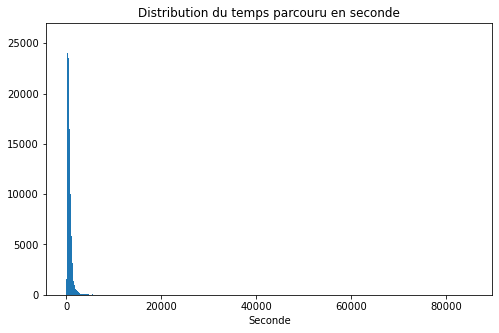

In [11]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Seconde')
plt.title('Distribution du temps parcouru en seconde')
plt.show()

Ce graphique n'est pas claire. C'est pourquoi nous faisons recours à la distribution logarithmique

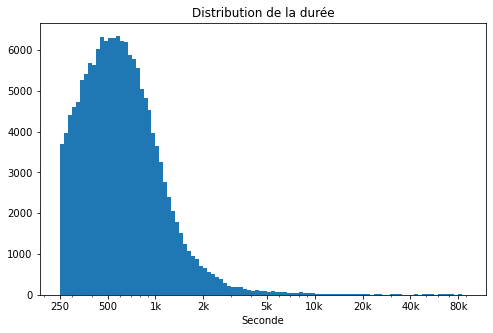

In [12]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([250,500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [250,500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.xlabel('Seconde')
plt.title('Distribution de la durée')
plt.show()

Avec la distribution logarithmique, nous avons pu clairement observer la répartition du temps passé sur un seul trajet. Et nous pouvons remarquer que la majorité se situe la partie gauche du graphique 

### La distribution des participants

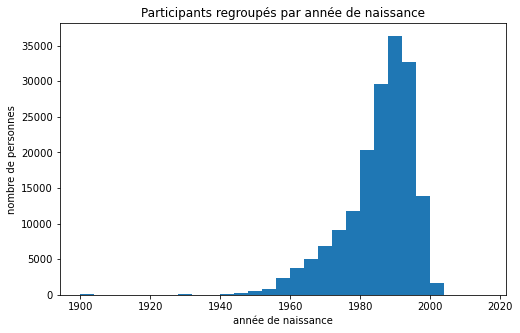

In [13]:
binsize = 4
bins = np.arange(1900, 2019, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlabel('année de naissance')
plt.ylabel('nombre de personnes')
plt.title('Participants regroupés par année de naissance')
plt.show()

Le système de partage acceuille beaucoup plus les jeunes adultes (Ceux qui sont nés entre 1980 et 2000)

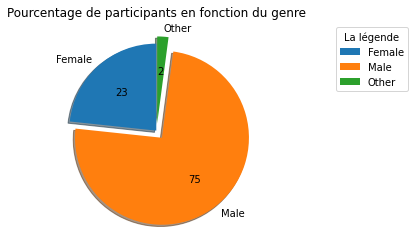

In [14]:
plt.figure(figsize = (10,4))
saison = np.sort((df.query('member_gender != "Unknown"'))['member_gender'].unique())
explode = np.random.uniform(0,0.15,len(saison))
plt.pie(np.array((df.query('member_gender != "Unknown" & member_birth_year > -1000')).groupby('member_gender')['member_gender'].count()), labels = saison, shadow = True, startangle=90, explode= explode, autopct='%.f')
plt.title('Pourcentage de participants en fonction du genre')
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper left',title = 'La légende')
plt.show()

Les hommes sont les plus actifs dans ce système

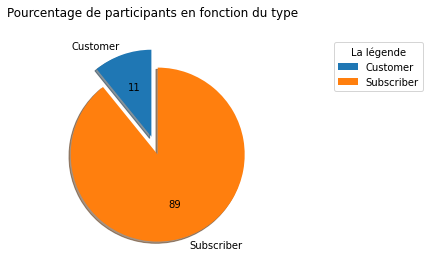

In [15]:
plt.figure(figsize = (10,4))
saison = np.sort(df['user_type'].unique())
explode = np.random.uniform(0,0.15,len(saison))
plt.pie(np.array(df.groupby('user_type')['user_type'].count()), labels = saison, shadow = True, startangle=90, explode= explode, autopct='%.f')
plt.title('Pourcentage de participants en fonction du type \n')
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='upper left',title = 'La légende')
plt.show()

Pour clore, nous remarquons qu'il y a plus d'abonnés que des clients 

### Discussion des distributions des variables 'duration_sec', 'member_gender', 'member_birth_year' et 'user_type'






> Nous avons eu un bon apercu de toutes les variables et avons pu déterminer que :
- <span style="color:green">La distribution de la durée d'un trajet est assez restreinte à une plage</span>
- <span style="color:green">Le système est plus utilisé par les jeunes de 19 à 39 que toutes les autres tranches d'âge.</span>
- <span style="color:green">Les hommes sont plus nombreux</span>
- <span style="color:green">Les abonnés sont plus nombreux que les clients</span>

<a id='bivariee'></a>
## <span style="color:blue">Exploration bivariée</span>

### Les corrélations

Nous commencerons par déterminier les corrélations entre les variables numériques à notre disposition

In [16]:
numeric_vars = ['duration_sec','bike_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']

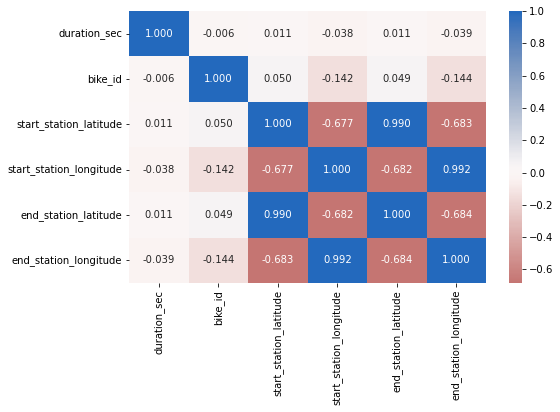

In [17]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Nous observons une forte corrélation entre :
- 'start_station_latitude' et 'end_station_latitude'
- 'start_station_longitude' et 'end_station_longitude'

df.shape= (183412, 16)
df_samp.shape= (500, 16)


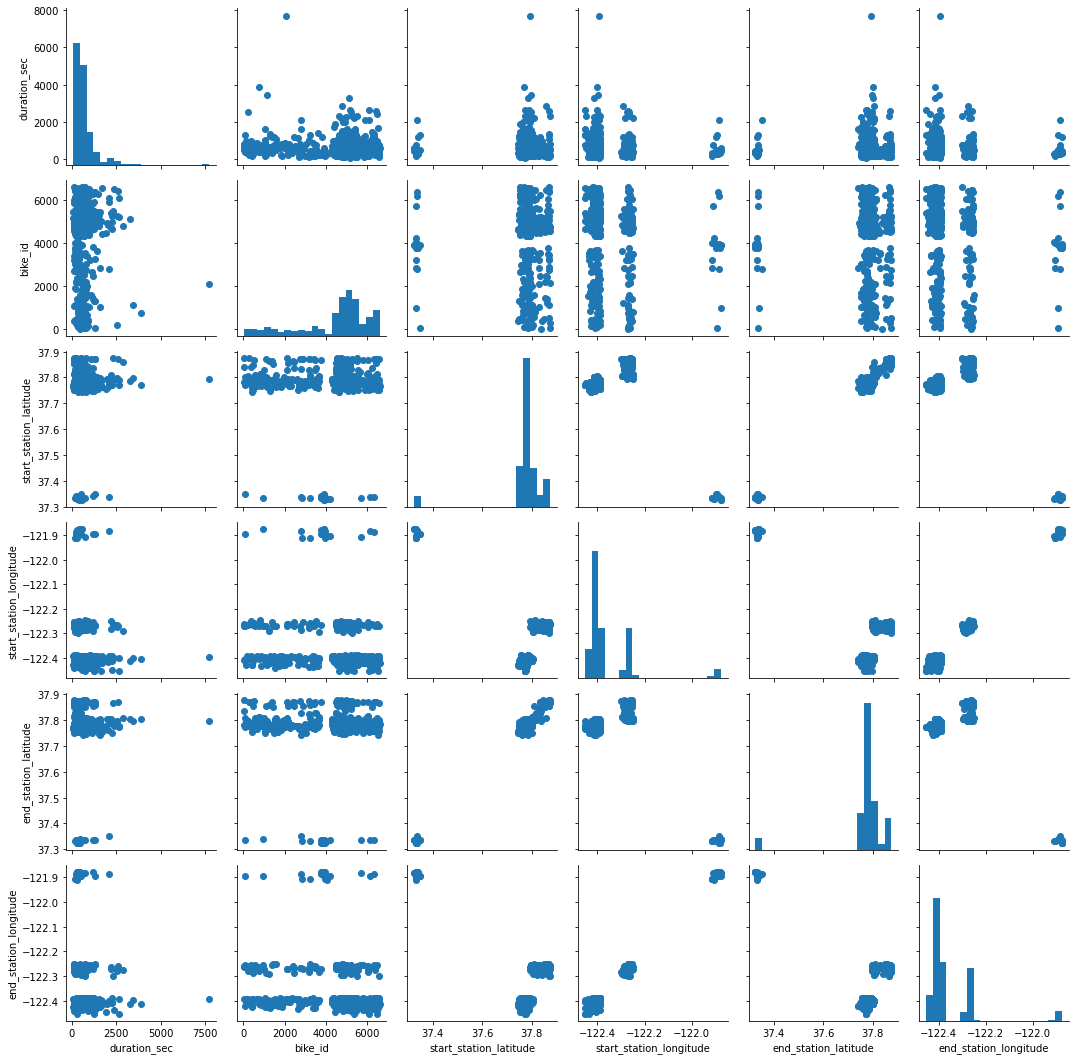

In [18]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("df.shape=",df.shape)
df_samp = df.sample(n=500, replace = False)
print("df_samp.shape=",df_samp.shape)

g = sns.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

intéressons nous maintenant à notre variable importante qui est la durée du trajet ('duration_sec')

<Figure size 720x720 with 0 Axes>

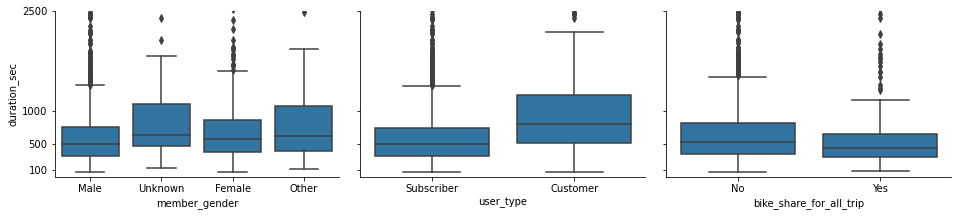

In [19]:
tmp = df.sample(n=2000, replace = False)


def draw(a, b, **kwargs):
    couleur = sns.color_palette()[0]
    sns.boxplot(x=a, y=b, color=couleur)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = tmp, y_vars = ['duration_sec'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(draw)
plt.yticks([100,500,1000,2500],['100','500','1000','2500'])
plt.ylim([0,2500])
plt.show();

### L'âge et la durée

Passons maintenant aux variables qui nous intéressent. Voyons s'il existe une correlation entre l'âge et la durée du trajet

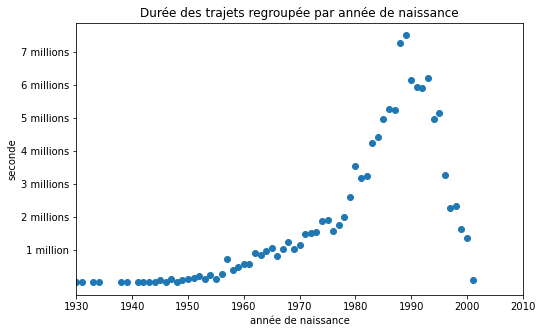

In [20]:
plt.figure(figsize=[8, 5])
plt.scatter(np.sort((df.query('member_birth_year > -1000')).member_birth_year.unique()),((df.query('member_birth_year > -1000')).groupby('member_birth_year')['duration_sec'].sum().reset_index().sort_values(by='member_birth_year')).duration_sec)
plt.xlabel('année de naissance')
plt.xlim([1930,2010])
plt.ylabel('seconde')
plt.yticks([1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6], ['1 million', '2 millions', '3 millions', '4 millions', '5 millions', '6 millions', '7 millions'])
plt.title('Durée des trajets regroupée par année de naissance')
plt.show()

De ce graphique, nous pouvons apprendre que l'âge y est bien pour beaucoup dans la distance parcourue. La courbe atteint son pic vers les années 1985-1995. cette étude ayant été faite en 2019, la population de ces années là a entre 14-24 ans. Ceci pour montrer que qu'en terme de distance parcouru, les jeunes adultes sont en tête de liste.

Et pourtant, nous n'allons pas nous limiter là. Nous ferons de nouveau la comparaison mais cette fois-ci en terme de moyenne



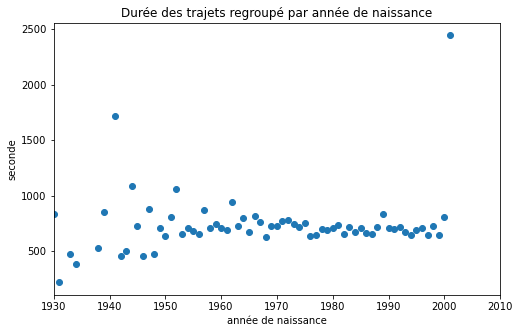

In [21]:
plt.figure(figsize=[8, 5])
plt.scatter(np.sort((df.query('member_birth_year > -1000')).member_birth_year.unique()),((df.query('member_birth_year > -1000')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec)
plt.xlabel('année de naissance')
plt.xlim([1930,2010])
plt.ylabel('seconde')
plt.title('Durée des trajets regroupé par année de naissance')
plt.show()

<span style="color:red">Le résultat est intéresant !</span>

Dans la moyenne, toutes les catégories d'âge ont une durée de trajet constante bien que les plus agés se démarquent du lot

<span style="color:green">Ce graphique confirme que l'âge a un impact significatif sur la durée du trajet</span>

### Le genre et la durée

Passons maintenant à la variable 'member_gender'

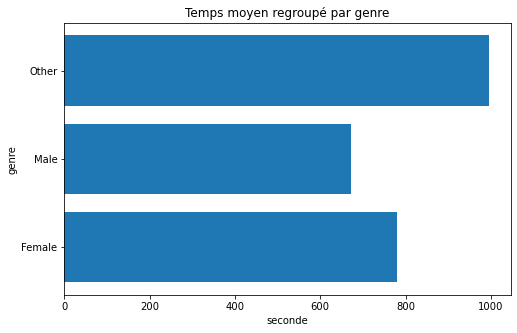

In [22]:
plt.figure(figsize=[8, 5])
plt.barh(np.sort(df.query('member_gender != "Unknown" & member_birth_year > -1000').member_gender.unique()), ((df.query('member_gender != "Unknown" & member_birth_year > -1000')).groupby('member_gender')['duration_sec'].mean().reset_index().sort_values(by='member_gender')).duration_sec )
plt.xlabel('seconde')
plt.ylabel('genre')
plt.title('Temps moyen regroupé par genre')
plt.show()

<Figure size 720x720 with 0 Axes>

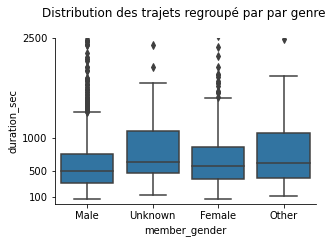

In [23]:
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = tmp, y_vars = ['duration_sec'], x_vars = ['member_gender'],
                height = 3, aspect = 1.5)
g.map(draw)
plt.yticks([100,500,1000,2500],['100','500','1000','2500'])
plt.ylim([0,2500])
plt.title('Distribution des trajets regroupé par par genre \n')
plt.show();

les hommes bien qu'étant plus nombreux ont la moyenne la plus faible. Contrairement par exemple, aux femmes. 

<span style="color:green">Ainsi nous pouvons affirmer  que les hommes moins de temps sur un vélo comparé aux autres </span>


### Le type et la durée

Ensuite, nous étudierons la relation entre le trajet et le type d'utilisateur (user_type).

Est-ce le fait d'être 'suscriber' ou 'customer' a un impact sur le trajet parcouru ?

In [24]:
tmp = df.groupby("user_type")["duration_sec"].mean().reset_index()
tmp

,user_type,duration_sec
0,Customer,1432.465019
1,Subscriber,640.263678


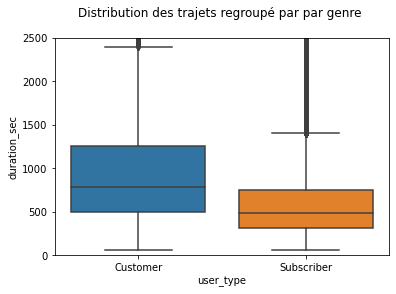

In [25]:
plt.figure(figsize = [6, 4])
sns.boxplot(data=df, x='user_type', y='duration_sec')
#plt.yticks([100,500,1000,2500],['100','500','1000','2500'])
plt.ylim([0,2500])
plt.title('Distribution des trajets regroupé par par genre \n')
plt.show();

<span style="color:green">Bien qu'étant moins nombreux, les clients passent en moyenne plus de temps que les abonnés sur un vélo</span>

### Les observations

> Ce que nous pouvons tirer comme observation est que :

-<span style="color:green">L'âge est très important dans notre capacité à supporter des longues durées. Il est un indicateur de performance très important</span>

-<span style="color:green">Le genre, bien qu'il soit important, reste tout de même moins pertinent étant donné que la plus grande différence de moyenne se joue à environ 400 secondes. Nous pouvons tout de même remarqué que les hommes sont enclins à fournir moins d'effort que les autres.</span>

<span style="color:green">Contrairement au genre, le type est important car il montre une différence assez nette entre les abonnés et les clients. Les clients ont plus tendance à faire plus que les habitués</span>

<a id='multivariee'></a>
## <span style="color:blue">Exploration multivariée</span>

Dans cette partie, nous verrons l'impact de plusieurs variables mises ensemble sur notre variable d'étude.

### La durée, l'âge et le type

In [26]:
tmp = df.groupby(['member_birth_year','user_type'])['duration_sec'].mean().reset_index()

<Figure size 576x432 with 0 Axes>

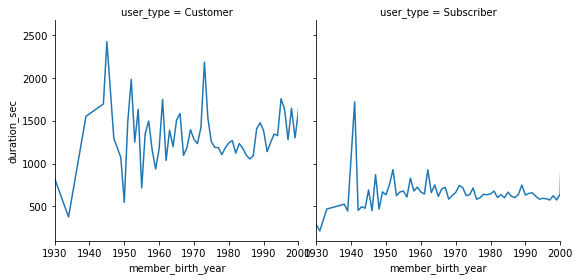

In [27]:
plt.figure(figsize = [8,6])
g=sns.FacetGrid(data=tmp, col='user_type', size=4)
g.map(plt.plot, 'member_birth_year', 'duration_sec')
plt.xlim([1930,2000])
plt.show();

Au fil du temps :
- <span style="color:green"> La moyenne des clients (Customer) évoluent en dent de scie</span>
- <span style="color:green"> Les abonnés malgré les différences d'âge ont un rythme constant</span>

### La durée, l'âge et le genre

In [28]:
tmp = df.groupby(['member_birth_year','member_gender'])['duration_sec'].mean().reset_index()

<Figure size 576x432 with 0 Axes>

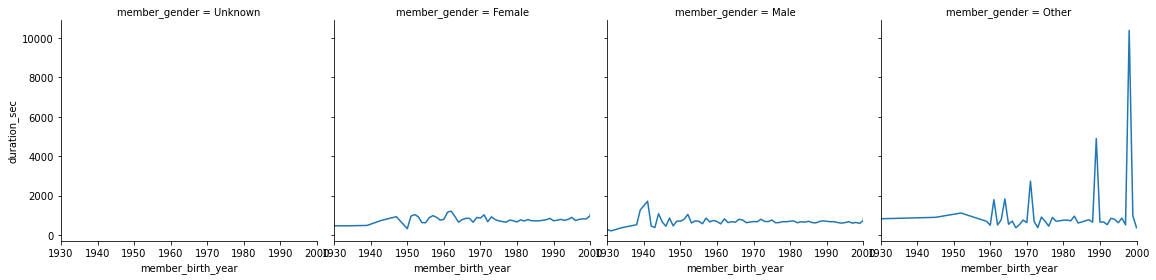

In [29]:
plt.figure(figsize = [8,6])
g=sns.FacetGrid(data=tmp, col='member_gender', size=4)
g.map(plt.plot, 'member_birth_year', 'duration_sec')
plt.xlim([1930,2000])
plt.show();

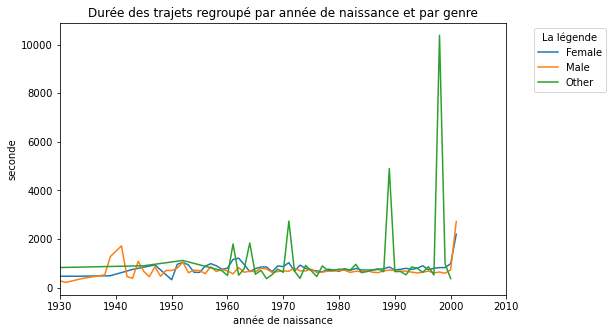

In [30]:
plt.figure(figsize=[8, 5])
# -- on enlève les valeurs abbérantes --
plt.plot(np.sort((df.query('member_birth_year > -1000 & member_gender == "Female"')).member_birth_year.unique()),((df.query('member_birth_year > -1000 & member_gender == "Female"')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec, label='Female')
plt.plot(np.sort((df.query('member_birth_year > -1000 & member_gender == "Male"')).member_birth_year.unique()),((df.query('member_birth_year > -1000 & member_gender == "Male"')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec, label='Male')
plt.plot(np.sort((df.query('member_birth_year > -1000 & member_gender == "Other"')).member_birth_year.unique()),((df.query('member_birth_year > -1000 & member_gender == "Other"')).groupby('member_birth_year')['duration_sec'].mean().reset_index().sort_values(by='member_birth_year')).duration_sec, label='Other')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',title = 'La légende')
plt.xlabel('année de naissance')
plt.xlim([1930,2010])
plt.ylabel('seconde')
plt.title('Durée des trajets regroupé par année de naissance et par genre')
plt.show();

>Compte tenu du fait que le graphique est compris entre 1930 et 2000, le genre "Unknow" n'a pas été considéré.

Dans ces graphiques, nous observons que :
- <span style="color:green"> La moyenne du genre 'Other' est plus elévée quand la population est de plus en plus jeune</span>
- <span style="color:green"> Les hommes, tout comme les femmes, ont un rythme constant avec un léger avantage pour ces dernières.</span>

### La durée, le type et le genre

In [31]:
tmp = df.groupby(['user_type','member_gender'])['duration_sec'].mean().reset_index()

<Figure size 576x432 with 0 Axes>

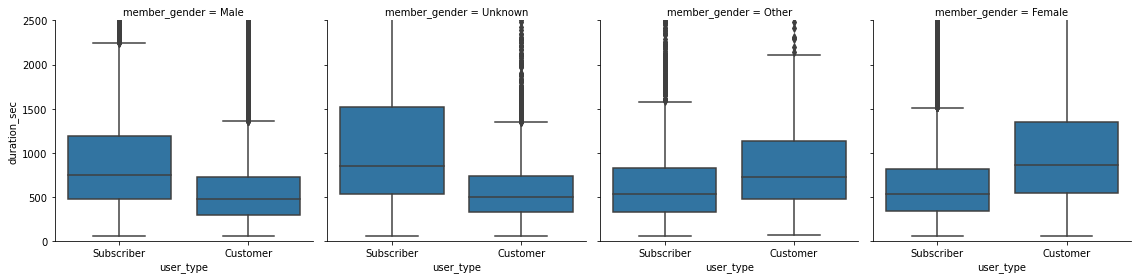

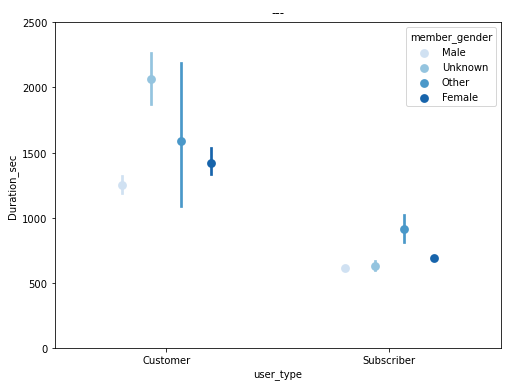

In [32]:
plt.figure(figsize = [8,6])
g=sns.FacetGrid(data=df, col='member_gender', size=4)
g.map(sns.boxplot, 'user_type', 'duration_sec')
plt.ylim([0,2500])
plt.show();

plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('---')
plt.ylabel('Duration_sec')
plt.ylim([0,2500])
plt.show();

Bien que les clients, en général, ont une moyenne supérieure aux abonnés, nous pouvons tout de même ressortir que les abonnés de genre 'Other' ou 'Female' sont plus actif que leurs homologues clients. 

<a id='conclusion'></a>
## <span style="color:blue">Conclusion</span>

Arrivé au terme de notre projet, nous avons pu ressortir les observations

> L'exploration univariée :

- <span style="color:green">La distribution de la durée d'un trajet est assez restreinte à une plage</span>
- <span style="color:green">Le système est plus utilisé par les jeunes de 19 à 39 que toutes les autres tranches d'âge.</span>
- <span style="color:green">Les hommes sont plus nombreux</span>
- <span style="color:green">Les abonnés sont plus nombreux que les clients</span>

> L'exploration bivariée :

- <span style="color:green">L'âge est très important dans notre capacité à supporter des longues durées. Il est un indicateur de performance très important</span>

- <span style="color:green">Le genre, bien qu'il soit important, reste tout de même moins pertinent étant donné que la plus grande différence de moyenne se joue à environ 400 secondes. Nous pouvons tout de même remarqué que les hommes sont enclins à fournir moins d'effort que les autres.</span>

- <span style="color:green">Contrairement au genre, le type est important car il montre une différence assez nette entre les abonnés et les clients. Les clients ont plus tendance à faire plus que les habitués</span>

> L'exploration multivariée :

- <span style="color:green"> La moyenne des clients (Customer) évoluent en dent de scie</span>
- <span style="color:green"> Les abonnés malgré les différences d'âge ont un rythme constant</span>
- <span style="color:green"> La moyenne du genre 'Other' est plus elévée quand la population est de plus en plus jeune</span>
- <span style="color:green"> Les hommes, tout comme les femmes, ont un rythme constant avec un léger avantage pour ces dernières.</span>
- <span style="color:green">Bien que les clients, en général, ont une moyenne supérieure aux abonnés, nous pouvons tout de même ressortir que les abonnés de genre 'Other' ou 'Female' sont plus actif que leurs homologues clients.</span>

<a id='limitation'></a>
## <span style="color:blue">Limitation</span>

Tout au long de notre analyse dans cette première partie, nous avons rencontré des limitations que nous aimerions partager avec vous.

Les 2 plus grandes étant :


>**Le traitement des données** : Bien que les valeurs nulles ont été comblées, elles nous font perdre en précision car nous ne pouvons pas faire une bonne analyse sur les lignes correspondantes.


> **La visualisation aux données**: n'ayant pas beaucoup de variables numériques sur lesquelles s'appuyer, il nous a fallu trouver des alternatives.

